##  Task: Using the USA_housing dataset build a model to predict the housing price and give the accuracies on both the training and test sets.

## Based, on your answers, does the model overfit or underfit? If yes, how can we improve the model?


- Hint:
    - Explore the data:
        - Check the dimensions
        - Check the column names
        - Display scatter plots of some of the features
        - Select the features and the target to build the model, and split into training and test sets
        - Scale the data
        - Build a linear regression model for the data
        - Determine if we need to regularize the model

### Import the required packages

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import seaborn as sns   # For statistical data visualization
import matplotlib.pyplot as plt   # For creating plots and visualizations
from sklearn.preprocessing import StandardScaler  # For standardization of features
from sklearn.model_selection import train_test_split  # For splitting the data
from sklearn.linear_model import LinearRegression  # For linear regression algorithm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # For model evaluation metrics
from sklearn.linear_model import Ridge  # For Ridge Regression algorithm
from sklearn.linear_model import Lasso  # For  Lasso algorithm


### load the dataset

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/data science /hull online/Ailead/ML /supervise learning /USA_Housing.csv')


In [ ]:
# view the data set
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
# let view the columns in our model
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
# rename the columns to avoid mistake
df.columns=df.columns.str.replace(" ","_")

## Explore the dataset

In [ ]:
# check the dimensions of the data
df.shape


(5000, 7)

In [ ]:
# checking the data propertise
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg._Area_Income              5000 non-null   float64
 1   Avg._Area_House_Age           5000 non-null   float64
 2   Avg._Area_Number_of_Rooms     5000 non-null   float64
 3   Avg._Area_Number_of_Bedrooms  5000 non-null   float64
 4   Area_Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


- The output represents a pandas DataFrame with 5000 entries and 7 columns. Each column contains non-null values, indicating that there are no missing values in the dataset. The columns include numerical data types (float64) for features such as average area income, house age, number of rooms, number of bedrooms, area population, and price. Additionally, there is one column of object type, likely representing textual data such as addresses. T. This summary provides an overview of the structure and content of the dataset, indicating it is ready for further analysis or processing.







In [ ]:
# check for missing values
df.isnull().sum()

Avg._Area_Income                0
Avg._Area_House_Age             0
Avg._Area_Number_of_Rooms       0
Avg._Area_Number_of_Bedrooms    0
Area_Population                 0
Price                           0
Address                         0
dtype: int64

- there is no missiing values in ourdata

###  check for correction

** Key factores **
- high correlation btw  the feature lead to mulitco linearity (to prevent this - lasso and reg regressor help to reduce the impart of highly correlated features)
- we dont want 60 - 70% correlation between the variables

<Axes: >

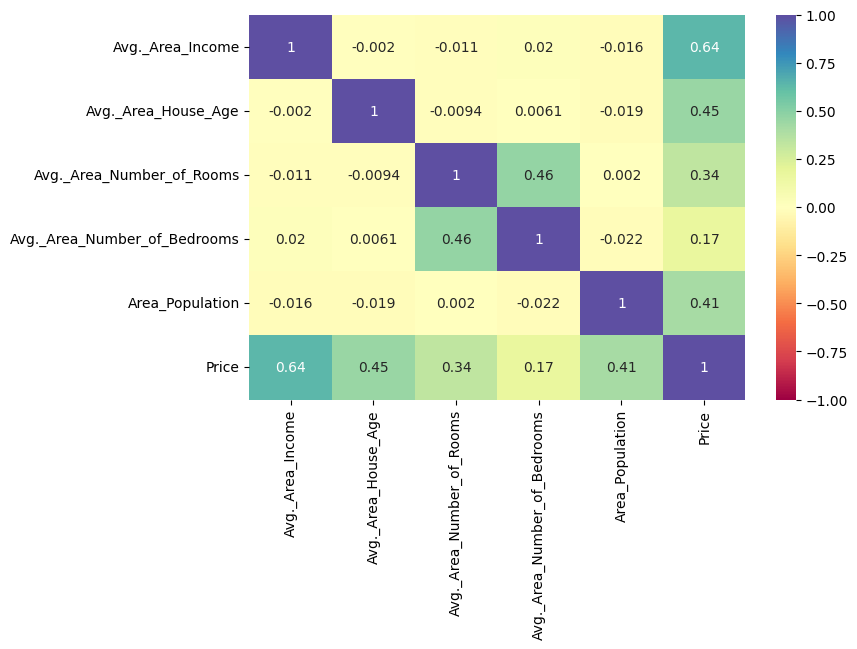

In [ ]:
# Check for correlation among numerical features
num_feat = df.select_dtypes(include="number")  # Select numerical features from the DataFrame

# Compute the correlation matrix
mat_corr = num_feat.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(mat_corr, vmin=-1, vmax=1, annot=True, cmap='Spectral')  # Display correlations with color bar between -1 and 1


**Based on the correlation matrix**:

*High Correlation:*

- The highest correlation exists between "Avg. Area Income" and "Price" with a correlation coefficient of 0.639734, indicating a strong positive correlation. This suggests that as the average area income increases, the house price tends to increase as well.
Another notable correlation is between "Avg. Area House Age" and "Price" with a coefficient of 0.452543, indicating a moderate positive correlation. This suggests that older houses tend to have lower prices.

*Low Correlation:*

- There is relatively low correlation between "Avg. Area Number of Bedrooms" and "Price" with a coefficient of 0.171071, indicating a weak positive correlation. This suggests that the number of bedrooms may not significantly influence the house price.
Similarly, the correlation between "Area Population" and "Price" is relatively low with a coefficient of 0.408556, suggesting a moderate positive correlation. This indicates that the population of the area may have some impact on house prices, but it's not very strong.

*Multicollinearity:*

- Multicollinearity refers to the situation where independent variables in a regression model are highly correlated. From the correlation matrix, there are no extremely high correlations between independent variables (features), indicating no severe issue of multicollinearity. However, there is a moderate correlation between "Avg. Area Number of Rooms" and "Avg. Area Number of Bedrooms" with a coefficient of 0.462695. This correlation suggests some degree of multicollinearity between these two features, which might affect the stability and interpretability of regression coefficients in a multiple regression model. Therefore, caution should be exercised when interpreting the coefficients of these variables in a regression analysis.






## Select the features needed for building the models

In [ ]:
# Define features (X) and target variable (y)
X = num_feat.drop("Price", axis=1)  # Features excluding the target variable "Price"
y = num_feat["Price"]  # Target variable "Price"


## Splitting the data into training and test set
- The essence of building a model is to use it to make predictions on new and unseen data. Hence, there is the need to split the
data into training and validation/test set, so we can build the model with the training set and validate with the test set.

In [ ]:
# split the data

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)


In [ ]:
# check the dimension of the train and test data

x_train.shape

(4000, 5)

In [ ]:
x_test.shape

(1000, 5)

## Normalize or Standardize the training and test data

In [ ]:
# instantiate of standardscaler

scaler = StandardScaler()

x_train_sd = scaler.fit_transform(x_train)
x_test_sd = scaler.transform(x_test)

## Linear Models
- Linear models are a class of models that are widely used in practice. Linear models are models that make a prediction using a linear function of the
input features.
\begin{align*}
\hat{y} = w[0] x[0] + w[1] x[1] + \dotsc + w[p] x[p] + b  \text{   (1) linear regression}
\end{align*}

- Here, $x[0]$ to $x[p]$ denotes the features (here the number of features is $p$) of a
single data point, $w$ and $b$ are parameters of the model that are learned, and $
\hat{y}$ is the prediction the model makes.

- Trying to learn the $w[0]$ and $b$ on a one-dimensional data set, might lead to the following:
    ![lr_image.PNG](attachment:lr_image.PNG)

## Linear Regression
- Linear regression or Ordinary Least Squares (OLS) is the simplest and most classic linear method for regression.
Linear regression finds the parameters $w$ and $b$ that minimize the mean squared
error between predictions and the true regression targets $y$ on the training set. The
mean squared error is the sum of the squared differences between the predictions and
the true values.

## Fitting the Linear Regression Model

In [ ]:
# Instantiate the Linear Regression algorithm
lin_reg = LinearRegression()  # Create an instance of LinearRegression model

# Fit the model to the training data
lin_reg.fit(x_train_sd, y_train)  # Train the model using standardized features (x_train_sd) and target variable (y_train)

# Get the coefficients (weights) and intercept (bias/offset) values
coefficent = lin_reg.coef_  # Coefficients of the features
intercept = lin_reg.intercept_  # Intercept value of the model

# Print the coefficients and intercept
print("coefficent:", coefficent)
print("intercept:", intercept)


coefficent: [231157.00897521 165326.83179735 121524.25417557   2697.0066375
 151236.17132081]
intercept: 1231911.4527395861


**The coefficients and intercept obtained from the Linear Regression model can be interpreted as follows:**

*Coefficients:*

The coefficient values represent the change in the predicted house price for a one-unit change in each respective feature, holding all other features constant.

For example:

- A one-unit increase in "Avg. Area Income" is associated with an increase in the predicted house price by $231,157.01.

- A one-unit increase in "Avg. Area House Age" is associated with an increase in the predicted house price by $165,326.83.

- A one-unit increase in "Avg. Area Number of Rooms" is associated with an increase in the predicted house price by $121,524.25.

- A one-unit increase in "Avg. Area Number of Bedrooms" is associated with an increase in the predicted house price by $2,697.01.

- A one-unit increase in "Area Population" is associated with an increase in the predicted house price by $151,236.17.

*Intercept:*

The intercept represents the base price of a house when all other features are zero. It is the predicted price of a house with no influence from any of the features.

- In this case, the intercept value is 1,231,911.45 dollars. This means that if all other factors are zero (which might not be practically meaningful), the predicted house price would start at approximately 1.23 million dollars.

These coefficients and intercept allow us to construct the linear regression equation to predict house prices based on the values of the input features.

## Model Performance Check
- Model performance check
- We will be using metric functions defined in sklearn for RMSE, MAE, and R2.

- We will define functions to calculate adjusted R2.

- The adjuted R2 penalizes the regression model for adding unimportant features.
- We will create a function that will print out all the above metrics in one go.

### Utility Funtion to evaluate the performance of the model

In [ ]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    """
    Calculate adjusted R-squared.

    Parameters:
    predictors: Independent variables
    targets: Dependent variable
    predictions: Predicted values

    Returns:
    Adjusted R-squared score
    """
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Parameters:
    targets: Actual target values
    predictions: Predicted values

    Returns:
    MAPE score
    """
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Compute different metrics to check regression model performance.

    Parameters:
    model: Regressor model
    predictors: Independent variables
    target: Dependent variable

    Returns:
    DataFrame containing various performance metrics
    """

    # Predict using the independent variables
    pred = model.predict(predictors)

    # Compute performance metrics
    r2 = r2_score(target, pred)  # R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # Adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # Root Mean Squared Error (RMSE)
    mae = mean_absolute_error(target, pred)  # Mean Absolute Error (MAE)
    mape = mape_score(target, pred)  # Mean Absolute Percentage Error (MAPE)
    mse = mean_squared_error(target, pred)  # Mean Squared Error (MSE)

    # Create a DataFrame of metrics
    df_perf = pd.DataFrame(
        {
            "MSE": mse,
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


### Checking model performance on training set

In [ ]:
# Compute performance metrics for the training set using the Linear Regression model
lin_reg_training = model_performance_regression(lin_reg, x_train_sd, y_train)

# Display the performance metrics for the training set
lin_reg_training


,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.013963e+10,100695.751773,81040.871388,0.91884,0.918739,7.648814


### Checking model performance on test set

In [ ]:
# Compute performance metrics for the test set using the Linear Regression model
lin_reg_test = model_performance_regression(lin_reg, x_test_sd, y_test)

# Display the performance metrics for the test set
lin_reg_test


,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.054972e+10,102711.838101,82657.946059,0.914645,0.914216,7.480128


### Checking model performance on test set

#### summary



The performance of the Linear Regression model was evaluated using various metrics for both the training and test sets. For the training set, the model achieved an RMSE of approximately  100,696 dollars and an MAE of 81,041 dollars, indicating that, on average, the predicted house prices deviate from the actual prices by around  100,696 dollars and 81,041 dollars, respectively. The R-squared value of 0.919 suggests that approximately 91.9% of the variance in house prices is explained by the model. Similarly, the adjusted R-squared value of 0.919 indicates that the model's explanatory power is still high, considering the number of features.  However, when evaluating the model's performance on the test set, the results were slightly worse, with an RMSE of approximately  102,712 dollars and an MAE of 82,658 dollars. The R-squared value decreased slightly to 0.915, indicating that the model's predictive performance is still strong but slightly lower than on the training set. The adjusted R-squared value also decreased slightly to 0.914. Overall, the model performs well on both the training and test sets, with minimal signs of overfitting, as the performance metrics on the test set are comparable to those on the training set, although there is a slight decrease in performance.

## Ridge Regression
- Ridge regression is also a linear model for regression.  In Ridge regression,the
coefficients w are chosen not only so that they predict well on the training data, but
there is an additional constraint. We also want the magnitude of coefficients to be as
small as possible; in other words, all entries of w should be close to 0.



- This constraint is an example of what is called regularization. Regularization means
explicitly restricting a model to avoid overfitting

In [ ]:
# instantiate the model
ridge = Ridge(random_state=0)

# fit the model
ridge.fit(x_train_sd,y_train)

# training and test accuracy



Ridge(random_state=0)

In [ ]:
# check performance of ridge regression on trian data
ridge_train = model_performance_regression(ridge, x_train_sd,y_train)
ridge_train

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.013964e+10,100695.79108,81041.764162,0.91884,0.918738,7.65001


In [ ]:
# check performance of ridge regression on testing data
ridge_test = model_performance_regression(ridge, x_test_sd,y_test)
ridge_test

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.054893e+10,102707.966108,82658.162002,0.914652,0.914223,7.480705


In [ ]:
ridge.coef_

array([231097.48350526, 165284.0354888 , 121483.51613443,   2715.33971562,
       151196.91305488])

- the coefficent is still high because it has not been reguilzed


###  model regularization

In [ ]:
# Looping through different values of alpha to evaluate its effect on model performance

alpha_values = np.linspace(0.2, 10, num=10)  # Start: 0.2, Stop: 10, Number of values: 10
for alpha in alpha_values:
    ridge = Ridge(random_state=0, alpha=alpha)  # Initializing Ridge regression model with current alpha value
    ridge.fit(x_train_sd, y_train)  # Fitting the model on standardized training data
    ridge_train = model_performance_regression(ridge, x_train_sd, y_train)  # Evaluating model performance on training data
    print(ridge_train)  # Printing training performance metrics
    print(alpha)  # Printing the current alpha value being evaluated


            MSE           RMSE           MAE  R-squared  Adj. R-squared  \
0  1.013963e+10  100695.753346  81041.049992    0.91884        0.918739   

       MAPE  
0  7.649053  
0.2
            MSE           RMSE           MAE  R-squared  Adj. R-squared  \
0  1.013965e+10  100695.817061  81042.026855    0.91884        0.918738   

       MAPE  
0  7.650355  
1.288888888888889
            MSE           RMSE           MAE  R-squared  Adj. R-squared  \
0  1.013968e+10  100695.973838  81043.045868    0.91884        0.918738   

      MAPE  
0  7.65166  
2.377777777777778
            MSE           RMSE           MAE  R-squared  Adj. R-squared  \
0  1.013973e+10  100696.223504  81044.090958   0.918839        0.918738   

       MAPE  
0  7.652965  
3.4666666666666672
            MSE           RMSE           MAE  R-squared  Adj. R-squared  \
0  1.013980e+10  100696.565889  81045.196132   0.918839        0.918737   

       MAPE  
0  7.654276  
4.555555555555556
            MSE           RMSE



The results show the performance metrics (MSE, RMSE, MAE, R-squared, Adj. R-squared, MAPE) for a Ridge regression model trained with different alpha values ranging from 0.2 to 10. As alpha increases, there is a slight increase in MSE, RMSE, MAE, and MAPE, indicating a slight decrease in model performance. However, R-squared and adjusted R-squared remain relatively stable around 0.9188, suggesting that the model explains around 91.88% of the variance in the data regardless of alpha value

Overall there was not significant improvement in the performance of the model using different alpha value

### visualizing the training and test accuracy

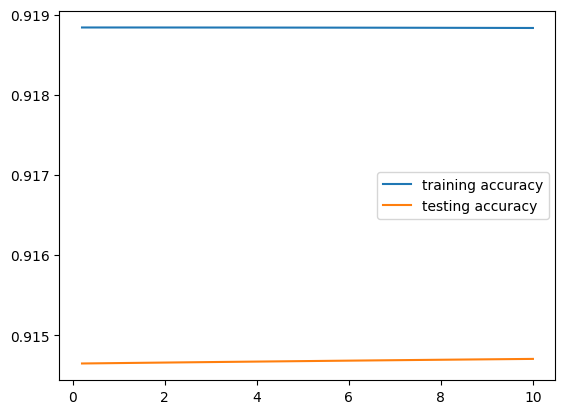

In [ ]:
### Showing training and testing accuracy

# Lists to store training and testing accuracies
train_acc = []
test_acc = []

# Generating alpha values for Ridge regression
alpha_values = np.linspace(0.2, 10, num=10)

# Looping through different alpha values
for alpha in alpha_values:
    ridge = Ridge(random_state=0, alpha=alpha)  # Initializing Ridge regression model with current alpha value
    ridge.fit(x_train_sd, y_train)  # Fitting the model on standardized training data
    train_acc.append(ridge.score(x_train_sd, y_train))  # Computing and storing training accuracy
    test_acc.append(ridge.score(x_test_sd, y_test))  # Computing and storing testing accuracy

# Plotting the training and testing accuracies against alpha values
plt.plot(alpha_values, train_acc, label="Training Accuracy")
plt.plot(alpha_values, test_acc, label="Testing Accuracy")
plt.legend(loc="best")  # Optional: Adding legend
plt.show()  # Displaying the plot


- This code calculates and plots the training and testing accuracies of a Ridge regression model for different alpha values, showing how the model's performance varies with regularization strength



## Lasso Regression
- An alternative to Ridge for regularizing linear regression is the Lasso. The lasso also
restricts coefficients to be close to zero, similarly to Ridge regression, but in a slightly
different way, called “l1” regularization.
- The consequence of l1 regularization is that when using the Lasso, some coefficients
are exactly zero.

In [ ]:
# train the Lasso model
lasso = Lasso(random_state=0)

# get the accuracy on both data sets

lasso.fit(x_train_sd,y_train)

Lasso(random_state=0)

In [ ]:
# check performance of lasso regression on trian data
lasso_train = model_performance_regression(lasso, x_train_sd,y_train)
lasso_train

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.013963e+10,100695.751792,81040.873167,0.91884,0.918739,7.648836


In [ ]:
# check performance ofLasso regression on test data
lasso_test = model_performance_regression(lasso, x_test_sd,y_test)
lasso_test

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.054970e+10,102711.721734,82657.870796,0.914646,0.914216,7.480131


In [ ]:
# Trying different values of alpha for Lasso regularization

# Generating alpha values for Lasso regression
alpha_values = np.linspace(0.001, 0.2, num=10)

# Looping through different alpha values
for alpha in alpha_values:
    lasso = Lasso(random_state=0, alpha=alpha)  # Initializing Lasso regression model with current alpha value
    lasso.fit(x_train_sd, y_train)  # Fitting the model on standardized training data
    lasso_train = model_performance_regression(lasso, x_train_sd, y_train)  # Evaluating model performance on training data
    print(lasso_train)  # Printing training performance metrics
    print(alpha)  # Printing the current alpha value being evaluated


            MSE           RMSE           MAE  R-squared  Adj. R-squared  \
0  1.013963e+10  100695.751773  81040.871378    0.91884        0.918739   

       MAPE  
0  7.648814  
0.001
            MSE           RMSE           MAE  R-squared  Adj. R-squared  \
0  1.013963e+10  100695.751773  81040.871188    0.91884        0.918739   

       MAPE  
0  7.648814  
0.023111111111111114
            MSE           RMSE           MAE  R-squared  Adj. R-squared  \
0  1.013963e+10  100695.751773  81040.871457    0.91884        0.918739   

       MAPE  
0  7.648815  
0.045222222222222226
            MSE           RMSE           MAE  R-squared  Adj. R-squared  \
0  1.013963e+10  100695.751773  81040.871727    0.91884        0.918739   

       MAPE  
0  7.648815  
0.06733333333333334
            MSE           RMSE           MAE  R-squared  Adj. R-squared  \
0  1.013963e+10  100695.751773  81040.870238    0.91884        0.918739   

       MAPE  
0  7.648815  
0.08944444444444445
            MSE  


The results show the performance metrics (MSE, RMSE, MAE, R-squared, Adj. R-squared, MAPE) for a Lasso regression model trained with different alpha values ranging from 0.001 to 0.2. Interestingly, regardless of the alpha value chosen within this range, the performance metrics remain virtually unchanged, indicating that the Lasso regularization may not significantly affect the model's performance on this dataset. The R-squared and adjusted R-squared values are consistently around 0.9188, indicating that the model explains approximately 91.88% of the variance in the data. Similarly, the mean absolute percentage error (MAPE) remains stable around 7.6488 across different alpha values.

### Model comparison


- Overall, all three models (Linear Regression, Ridge Regression, and Lasso Regression) perform similarly in terms of their performance metrics on the test dataset, with minor differences observed in MSE, RMSE, and MAE. The R-squared values indicate that each model explains approximately 91.46% of the variance in the data. The mean absolute percentage error (MAPE) is around 7.48%, suggesting that, on average, the models' predictions deviate by approximately 7.48% from the actual prices.


- Based on the provided performance metrics, all three models show similar performance on the test dataset. Therefore, the choice of the "best" model could depend on other factors such as interpretability, computational efficiency, or the specific goals of the analysis. It's recommended to consider these factors in the context of your project requirements to determine the most suitable model